# Back Propagation

## 1. loading of data

In [ ]:
from google.colab import files
uploaded=files.upload()

# 2. Computational graph

<img src='https://i.imgur.com/seSGbNS.png'>

<pre>
1. if you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]
2. the final output of this graph is a value L which is computed as (Y-Y')^2
</pre>

### Task 1: Implementing backpropagation and Gradient checking


<pre>1. <b>Check this video for better understanding of the computational graphs and back propagation:</b> <a href='https://www.youtube.com/watch?v=i94OvYb6noo#t=1m33s'>https://www.youtube.com/watch?v=i94OvYb6noo</a>
</pre>

<pre>
2. <b>write two functions</b>

#you can modify the definition of this function according to your needs
<font color='green'>
def forward_propagation(X, y, W):
        <font color='grey'>
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph, ..., W[8] corresponds to w9 in graph.
        # write code to compute the value of L=(y-y')^2
        </font>
        return (L, any other variables which you might need to use for back propagation)
        <font color='grey'>
        # Hint: you can use dict type to store the required intermediate variables
        </font>
</font>
</pre>

<pre>
# you can modify the definition of this function according to your needs
<font color='blue'>
def backward_propagation(L, Variables):
        <font color='grey'>
        # L: the loss we calculated for the current point
        # Variables: the outputs of the forward_propagation() function
        # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
        </font>
        return dW
        <font color='grey'>
        # here dW can be a list, or dict or any other data type wich will have gradients of all the weights
        # Hint: you can use dict type to store the required variables
        </font>
</font>
</pre>
3. <b> <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>Gradient checking</a></b>:<a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a>

<pre>we know that the derivative of any function is </pre>$$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$
<pre>
The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared.

In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of gradient checking!

</pre>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$

from the above function lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> =
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}

to do this task you need to write a function
<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):
    <font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()
    </font>
    approx_gradients = []
    for each wi weight value in W:
        <font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi
        </font>
        approx_gradients.append(approximation gradients of weight wi)
    <font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with      gradient_check formula
    </font>
    return gradient_check
</font>
NOTE: you can do sanity check by checking all the return values of gradient_checking(), they have to be zero. if not you have bug in your code
</pre>

### Task 2: Optimizers

1. As a part of this task, you will be implementing 3 type of optimizers(methods to update weight)
2. check this video and blog: https://www.youtube.com/watch?v=gYpoJMlgyXA,  http://cs231n.github.io/neural-networks-3/
3. use the same computational graph that was mentioned above to do this task
4. initilze the 9 weights from normal distribution with mean=0 and std=0.01

5.

<pre>
    for each epoch(1-100):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
</pre>

6.

<pre>
<b>task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights
<b>task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights
<b>task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights
</pre>



In [ ]:
from google.colab import files
uploaded=files.upload()

Saving data.pkl to data.pkl


In [ ]:

import pickle
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)


(506, 6)
(506, 5) (506,)


In [ ]:
import numpy as np

w=np.random.rand(9)

a1=w[0]*X[1][0]
a2=w[1]*X[1][1]
a3=a1+a2
a4=(a3)**2
a5=a4+w[5]
a6=np.exp(a5)
a7=a6+w[6]
a8=np.tanh(a7)
b1=X[1][2]*w[2]
b2=X[1][3]*w[3]
b3=X[1][4]*w[4]
b4=np.sin(b1)
b5=b2+b3
b6=b4*b5
b7=b6+w[7]
b8=(1/(1 + np.exp(-b7)))
b9=b8*w[8]
y_pred=b9+a8


In [ ]:

def forward(w,X,y):
  loss=0
  loss+=(y[0]-y_pred)**2
  return loss
def backward(w,X,y):
      w1=[]
      w[0]=w[0]-0.001*(-2*(y[1]-y_pred)*(1-(np.tanh(a7))**2)*np.exp(a5)*(2*a3*X[1][0]))
      w[1]=w[1]-0.001*(-2*(y[1]-y_pred)*(1-(np.tanh(a7))**2)*np.exp(a5)*(2*a3*X[1][1]))
      w[2]=w[2]-0.001*(-2*(y[1]-y_pred)*w[8]*(1/(1 + np.exp(-b7)))*(1-(1/(1 + np.exp(-b7))))*b5*np.cos(b1)*X[1][2])
      w[3]=w[3]-0.001*(-2*(y[1]-y_pred)*w[8]*(1/(1 + np.exp(-b7)))*(1-(1/(1 + np.exp(-b7))))*b4*X[1][3])
      w[4]=w[4]-0.001*(-2*(y[1]-y_pred)*w[8]*(1/(1 + np.exp(-b7)))*(1-(1/(1 + np.exp(-b7))))*b4*X[1][4])
      w[5]=w[5]-0.001*(-2*(y[1]-y_pred)*(1-(np.tanh(a7))**2)*np.exp(a5))
      w[6]=w[6]-0.001*(-2*(y[1]-y_pred)*(1-(np.tanh(a7))**2))
      w[7]=w[7]-0.001*(-2*(y[1]-y_pred)*w[8]*(1/(1 + np.exp(-b7)))*(1-(1/(1 + np.exp(-b7)))))
      w[8]=w[8]-0.001*(-2*(y[1]-y_pred)*b8)
      for i in range(9):
        w1.append(w[i])
      return w1
def gradient_check(w,x,y,eps=1e-3):
  di=[]
  for i in range(9):
    w1_plus=w[i]+eps
    w1_min=w[i]-eps
    plus=forward(w1_plus,X,y)
    minus=forward(w1_min,X,y)
    grad_pro=(plus-minus)/(2*eps)
    grad=backward(w,X,y)
    num=np.linalg.norm(grad-grad_pro)
    den=np.linalg.norm(grad+grad_pro)
    dif=num/den
    di.append(dif)
    if(dif<1e-7):
      print("correct")
    else:
      print("wrong")
  return dif
a=gradient_check(w,X,y)

correct
correct
correct
correct
correct
correct
correct
correct
correct


TASK-2

In [ ]:
import numpy as np

loss=0
y_pred=[]
for i in range(len(X)):
  a1=w[0]*X[i][0]
  a2=w[1]*X[i][1]
  a3=a1+a2
  a4=(a3)**2
  a5=a4+w[5]
  a6=np.exp(a5)
  a7=a6+w[6]
  a8=np.tanh(a7)
  b1=X[i][2]*w[2]
  b2=X[i][3]*w[3]
  b3=X[i][4]*w[4]
  b4=np.sin(b1)
  b5=b2+b3
  b6=b4*b5
  b7=b6+w[7]
  b8=(1/(1 + np.exp(-b7)))
  b9=b8*w[8]
  c1=b9+a8
  y_pred.append(c1)

VANILLA update

In [ ]:
import numpy as np
def forward(w,X,y):
 loss=0
 y_pred=[]
 for i in range(len(X)):
  a1=w[0]*X[i][0]
  a2=w[1]*X[i][1]
  a3=a1+a2
  a4=(a3)**2
  a5=a4+w[5]
  a6=np.exp(a5)
  a7=a6+w[6]
  a8=np.tanh(a7)
  b1=X[i][2]*w[2]
  b2=X[i][3]*w[3]
  b3=X[i][4]*w[4]
  b4=np.sin(b1)
  b5=b2+b3
  b6=b4*b5
  b7=b6+w[7]
  b8=(1/(1 + np.exp(-b7)))
  b9=b8*w[8]
  c1=b9+a8
  y_pred.append(c1)
  loss+=(y[i]-y_pred[i])**2
 return loss*(1/(len(data)))


0.0005114657831111476
0.00017773013280904726
4.095541836101171e-05
1.7536721394306018e-06
4.867959370067003e-06
2.0711165002753867e-05
3.667414123717e-05
4.90018943503446e-05
5.751499157781845e-05
6.306471676882155e-05
6.656707031621307e-05
6.873468901613346e-05
7.005923712485591e-05
7.086077644338101e-05
7.134124913701273e-05
7.162583435771917e-05
7.179133137803114e-05
7.18845704826062e-05
7.193400297056861e-05
7.195687551701402e-05


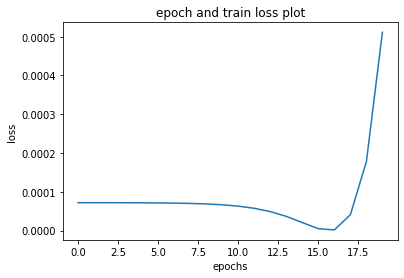

In [ ]:
import numpy as np
def forward(w,X,y):
  loss=0
  y_pred=[]
  a1=w[0]*X[0]
  a2=w[1]*X[1]
  a3=a1+a2
  a4=(a3)**2
  a5=a4+w[5]
  a6=np.exp(a5)
  a7=a6+w[6]
  a8=np.tanh(a7)
  b1=X[2]*w[2]
  b2=X[3]*w[3]
  b3=X[4]*w[4]
  b4=np.sin(b1)
  b5=b2+b3
  b6=b4*b5
  b7=b6+w[7]
  b8=(1/(1 + np.exp(-b7)))
  b9=b8*w[8]
  c1=b9+a8
  y_pred.append(c1)
  loss+=(y-y_pred[0])**2
  k=[]
  k.append([a1,a2,a3,a4,a5,a6,a7,a8,b1,b2,b3,b4,b5,b6,b7,b8,b9,c1])
  k=k[0]
  return loss*(1/(len(data))),k,c1
def backward3(w,X,y,k,y_pred):
  w1=[]
  w[0]+=-0.001*(-2*(y-y_pred)*(1-(np.tanh(k[6]))**2)*np.exp(k[4])*(2*k[2]*X[0]))
  w[1]+=-0.001*(-2*(y-y_pred)*(1-(np.tanh(k[6]))**2)*np.exp(k[4])*(2*k[2]*X[1]))
  w[2]+=-0.001*(-2*(y-y_pred)*w[8]*(1/(1 + np.exp(-k[14])))*(1-(1/(1 + np.exp(-k[14]))))*k[11]*np.cos(k[8])*X[2])
  w[3]+=-0.001*(-2*(y-y_pred)*w[8]*(1/(1 + np.exp(-k[14])))*(1-(1/(1 + np.exp(-k[14]))))*k[11]*X[3])
  w[4]+=-0.001*(-2*(y-y_pred)*w[8]*(1/(1 + np.exp(-k[14])))*(1-(1/(1 + np.exp(-k[14]))))*k[11]*X[4])
  w[5]+=-0.001*(-2*(y-y_pred)*(1-(np.tanh(k[6])))*np.exp(k[4]))
  w[6]+=-0.001*(-2*(y-y_pred)*(1-(np.tanh(k[6]))))
  w[7]+=-0.001*(-2*(y-y_pred)*w[8]*(1/(1 + np.exp(-k[14])))*(1-(1/(1 + np.exp(-k[14])))))
  w[8]+=-0.001*(-2*(y-y_pred)*k[15])
  for k in range(9):
    w1.append(w[k])
  return w1
epoh=20
LOSS=[]
wa = np.random.normal(0,0.01,9)
for j in range(epoh):
  for m in range(len(X)):
    a,k,y_pred=forward(wa,X[m],y[m])
    wa=backward3(wa,X[m],y[m],k,y_pred)

  print(a)
  LOSS.append(a)
e=[]
for i in range(20):
  e.append(i)
import matplotlib.pyplot as plt
LOSS.reverse()
%matplotlib inline
plt.plot(e,LOSS)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("epoch and train loss plot")
plt.show()

observations:

1.the vanilla update is used to change parameters along negative gradient direction.in this update,the learning rate is kept constant so,the loss function makes non negative progress.

2.at epoch 16,we got the minimized loss than all other epochs

MOMENTUM UPDATE


In [ ]:
np.seterr(over='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

0.00046132939398693716
0.00015967761814050568
3.7683856256985723e-05
1.7666954047260038e-06
4.3308286214076825e-06
1.932343581092378e-05
3.499154523380967e-05
4.747286018873604e-05
5.633756754020345e-05
6.22693995034357e-05


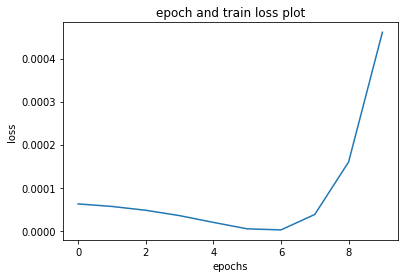

In [ ]:
import numpy as np
def forward(w,X,y):
  loss=0
  y_pred=[]
  a1=w[0]*X[0]
  a2=w[1]*X[1]
  a3=a1+a2
  a4=(a3)**2
  a5=a4+w[5]
  a6=np.exp(a5)
  a7=a6+w[6]
  a8=np.tanh(a7)
  b1=X[2]*w[2]
  b2=X[3]*w[3]
  b3=X[4]*w[4]
  b4=np.sin(b1)
  b5=b2+b3
  b6=b4*b5
  b7=b6+w[7]
  b8=(1/(1 + np.exp(-b7)))
  b9=b8*w[8]
  c1=b9+a8
  y_pred.append(c1)
  loss+=(y-y_pred[0])**2
  k=[]
  k.append([a1,a2,a3,a4,a5,a6,a7,a8,b1,b2,b3,b4,b5,b6,b7,b8,b9,c1])
  k=k[0]
  return loss*(1/(len(data))),k,c1
def backward3(w,X,y,k,y_pred):
    w1=[]
    w[0]+=0.1*0.9-0.001*(-2*(y-y_pred)*(1-(np.tanh(k[6]))**2)*np.exp(k[4])*(2*k[2]*X[0]))
    w[1]+=0.1*0.9-0.001*(-2*(y-y_pred)*(1-(np.tanh(k[6]))**2)*np.exp(k[4])*(2*k[2]*X[1]))
    w[2]+=0.1*0.9-0.001*(-2*(y-y_pred)*w[8]*(1/(1 + np.exp(-k[14])))*(1-(1/(1 + np.exp(-k[14]))))*k[11]*np.cos(k[8])*X[2])
    w[3]+=0.1*0.9-0.001*(-2*(y-y_pred)*w[8]*(1/(1 + np.exp(-k[14])))*(1-(1/(1 + np.exp(-k[14]))))*k[11]*X[3])
    w[4]+=0.1*0.9-0.001*(-2*(y-y_pred)*w[8]*(1/(1 + np.exp(-k[14])))*(1-(1/(1 + np.exp(-k[14]))))*k[11]*X[4])
    w[5]+=0.1*0.9-0.001*(-2*(y-y_pred)*(1-(np.tanh(k[6]))**2)*np.exp(k[4]))
    w[6]+=0.1*0.9-0.001*(-2*(y-y_pred)*(1-(np.tanh(k[6]))**2))
    w[7]+=0.1*0.9-0.001*(-2*(y-y_pred)*w[8]*(1/(1 + np.exp(-k[14])))*(1-(1/(1 + np.exp(-k[14])))))
    w[8]+=0.1*0.9-0.001*(-2*(y-y_pred)*k[15])
    for k in range(9):
      w1.append(w[k])
    return w1
epoh=10
LOSS=[]
wa = np.random.normal(0,0.01,9)
for j in range(epoh):
  for m in range(len(X)):
    a,k,y_pred=forward(wa,X[m],y[m])
    wa=backward3(wa,X[m],y[m],k,y_pred)
  print(a)
  LOSS.append(a)
e=[]
for i in range(10):
  e.append(i)
import matplotlib.pyplot as plt
LOSS.reverse()
%matplotlib inline
plt.plot(e,LOSS)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("epoch and train loss plot")
plt.show()

1.momentum update is used to reduce oscillations and make the convergence faster by increasing momentum term for gradients in positive direction,then for gradients changing direction

2.here as,we know the momentum update is better than vannila update,because it adds a fraction of update vector of previous time stamp to present vector,it converges fast.

ADAM UPDATE

In [ ]:
def backward2(w,X,y,k,y_pred):
      w1=[]
      beta1=0.9
      beta2=0.999
      v=0.001
      eps=1e-8
      for i in range(len(X)):
        m1 = beta1*0.001 + (1-beta1)*(-2*(y-y_pred)*(1-(np.tanh(k[6]))**2)*np.exp(k[4])*(2*k[2]*X[0]))
        v1 = beta2*v + (1-beta2)*((-2*(y-y_pred)*(1-(np.tanh(k[6]))**2)*np.exp(k[4])*(2*k[2]*X[0]))**2)
        w[0]+=-0.001* m1 / (np.sqrt(v1) + eps)

        m2 = beta1*0.001 + (1-beta1)*(-2*(y-y_pred)*(1-(np.tanh(k[6]))**2)*np.exp(k[4])*(2*k[2]*X[1]))
        v2 = beta2*v + (1-beta2)*(1-beta1)*(-2*(y-y_pred)*(1-(np.tanh(k[6]))**2)*np.exp(k[4])*(2*k[2]*X[1])**2)
        w[1]+=-0.001* m2 / (np.sqrt(v2) + eps)

        m3 = beta1*0.001 + (1-beta1)*(-2*(y-y_pred)*w[8]*(1/(1 + np.exp(-k[14])))*(1-(1/(1 + np.exp(-k[14]))))*k[12]*np.cos(k[8])*X[2])
        v3 = beta2*v + (1-beta2)*((-2*(y-y_pred)*w[8]*(1/(1 + np.exp(-k[14])))*(1-(1/(1 + np.exp(-k[14]))))*k[12]*np.cos(k[8])*X[2])**2)
        w[2]+=-0.001* m3 / (np.sqrt(v3) + eps)

        m4 = beta1*0.001 + (1-beta1)*(-2*(y-y_pred)*w[8]*(1/(1 + np.exp(-k[14])))*(1-(1/(1 + np.exp(-k[14]))))*k[11]*X[3])
        v4 = beta2*v + (1-beta2)*((-2*(y-y_pred)*w[8]*(1/(1 + np.exp(-k[14])))*(1-(1/(1 + np.exp(-k[14]))))*k[11]*X[3])**2)
        w[3]+=-0.001* m4 / (np.sqrt(v4) + eps)

        m5 = beta1*0.001 + (1-beta1)*(-2*(y-y_pred)*w[8]*(1/(1 + np.exp(-k[14])))*(1-(1/(1 + np.exp(-k[14]))))*k[11]*X[4])
        v5 = beta2*v + (1-beta2)*((-2*(y-y_pred)*w[8]*(1/(1 + np.exp(-k[14])))*(1-(1/(1 + np.exp(-k[14]))))*k[11]*X[4])**2)
        w[4]+=-0.001* m5 / (np.sqrt(v5) + eps)

        m6 = beta1*0.001 + (1-beta1)*(-2*(y-y_pred)*(1-(np.tanh(k[6]))**2)*np.exp(k[4]))
        v6 = beta2*v + (1-beta2)*((-2*(y-y_pred)*(1-(np.tanh(k[6]))**2)*np.exp(k[4]))**2)
        w[5]+=-0.001* m6 / (np.sqrt(v6) + eps)

        m7 = beta1*0.001 + (1-beta1)*(-2*(y-y_pred)*(1-(np.tanh(k[6]))**2))
        v7 = beta2*v + (1-beta2)*((-2*(y-y_pred)*(1-(np.tanh(k[6]))**2))**2)
        w[6]+=-0.001* m7 / (np.sqrt(v7) + eps)

        m8 = beta1*0.001 + (1-beta1)*(-2*(y-y_pred)*w[8]*(1/(1 + np.exp(-k[14])))*(1-(1/(1 + np.exp(-k[14])))))
        v8 = beta2*v + (1-beta2)*((-2*(y-y_pred)*w[8]*(1/(1 + np.exp(-k[14])))*(1-(1/(1 + np.exp(-k[14])))))**2)
        w[7]+=-0.001* m8 / (np.sqrt(v8) + eps)

        m9 = beta1*0.001 + (1-beta1)*(-2*(y-y_pred)*k[15])
        v9 = beta2*v + (1-beta2)*((-2*(y-y_pred)*k[15])**2)
        w[8]+=-0.001* m9 / (np.sqrt(v9) + eps)
      for k in range(9):
         w1.append(w[k])
      return w1

In [ ]:
import numpy as np
def forward(w,X,y):
  loss=0
  y_pred=[]
  a1=w[0]*X[0]
  a2=w[1]*X[1]
  a3=a1+a2
  a4=(a3)**2
  a5=a4+w[5]
  a6=np.exp(a5)
  a7=a6+w[6]
  a8=np.tanh(a7)
  b1=X[2]*w[2]
  b2=X[3]*w[3]
  b3=X[4]*w[4]
  b4=np.sin(b1)
  b5=b2+b3
  b6=b4*b5
  b7=b6+w[7]
  b8=(1/(1 + np.exp(-b7)))
  b9=b8*w[8]
  c1=b9+a8
  y_pred.append(c1)
  loss+=(y-y_pred[0])**2
  k=[]
  k.append([a1,a2,a3,a4,a5,a6,a7,a8,b1,b2,b3,b4,b5,b6,b7,b8,b9,c1])
  k=k[0]
  return loss*(1/(len(data))),k,c1

0.00012195948138687921
6.557580255778899e-05
1.0298416896622926e-05
3.130591087479643e-07
8.72649773527931e-06
1.8981830032122997e-05
2.646705381652999e-05
3.127120731018398e-05
3.406719428587539e-05
3.530860433646324e-05


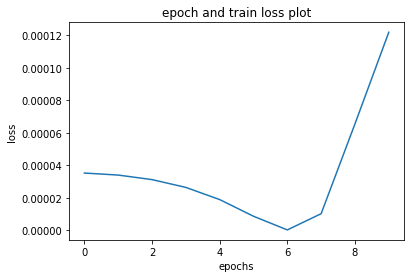

In [ ]:
epoh=10
LOSS=[]
wa = np.random.normal(0,0.01,9)
for j in range(epoh):
  for m in range(len(X)):
    a,k,y_pred=forward(wa,X[m],y[m])
    wa=backward2(wa,X[m],y[m],k,y_pred)
  print(a)
  LOSS.append(a)
e=[]
for i in range(10):
  e.append(i)
import matplotlib.pyplot as plt
LOSS.reverse()
%matplotlib inline
plt.plot(e,LOSS)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("epoch and train loss plot")
plt.show()

ADAM UPDATE:
1.it computes adaptive learning rates for each parameter and also,stores decaying average of past squared gradients.

2.so,by this update we got less loss with less number of epochs.it is best compared to other two update types.


CONCLUSION:

1.we can notice a gradual improvent in finding less loss in less number of epochs in above gradient update techniques,the adam update which uses adaptive learning rates is better than momentum update which uses previous timestamp update vector,is inturn better than vannila update,which uses constant learning rate.